<a href="https://colab.research.google.com/github/kshitij-bhardwaj/Voice-Morph-Companion/blob/kshitij-bhardwaj/Week%202/Clustering%20Assignment/Clustering-Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1 : Clustering

Customer Segmentation is the subdivision of a market into discrete customer groups that share similar characteristics. Customer Segmentation can be a powerful means to identify unsatisfied customer needs.

The csv file **segmentation data.csv** contains basic data about some customers like Customer ID, age, gender, annual income and spending score. You want to classify the customers into different groups so that marketing strategy could be planned in the future accordingly. How many different groups should be made ? What should be the approach ?

This is an Unsupervised Learning question since it doesn't provide you with labels - the groups.

### 1. Import the necessary modules

In [58]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

### 2. Read the csv file "segmentation data.csv" present in the Github repository as a Pandas DataFrame.

In [59]:
data = pd.read_csv("segmentation data.csv")

### 3. Do the necessary preprocessing of the data.

> Drop unwanted columns.

> Check for null values.

> Scale the numerical columns.

> Additionally, you may also make the Age column have categorical values. How ? Apply some function that makes age groups turns all ages in some group to a particular number !

Note : Don't do everything in a single code block ! Do it step-by-step and show output for each step.

In [60]:
# Define age groups (adjust ranges and labels as needed)
age_groups = [
    (1, 18, 30),
    (2, 31, 50),
    (3, 51, 100)
]

# Create a function to assign age groups
def assign_age_group(age):
    for label, min_age, max_age in age_groups:
        if min_age <= age <= max_age:
            return label
    return "Unknown"  # Handle cases outside defined groups

# Apply the function to create a new 'Age Group' column
data['Age'] = data['Age'].apply(assign_age_group)
print(data)

             ID  Sex  Marital status  Age  Education  Income  Occupation  \
0     100000001    0               0    3          2  124670           1   
1     100000002    1               1    1          1  150773           1   
2     100000003    0               0    2          1   89210           0   
3     100000004    0               0    2          1  171565           1   
4     100000005    0               0    3          1  149031           1   
...         ...  ...             ...  ...        ...     ...         ...   
1995  100001996    1               0    2          1  123525           0   
1996  100001997    1               1    1          1  117744           1   
1997  100001998    0               0    2          0   86400           0   
1998  100001999    1               1    1          1   97968           0   
1999  100002000    0               0    1          0   68416           0   

      Settlement size  
0                   2  
1                   2  
2              

In [61]:
X = data.drop('ID', axis = 1)
print(X)

      Sex  Marital status  Age  Education  Income  Occupation  Settlement size
0       0               0    3          2  124670           1                2
1       1               1    1          1  150773           1                2
2       0               0    2          1   89210           0                0
3       0               0    2          1  171565           1                1
4       0               0    3          1  149031           1                1
...   ...             ...  ...        ...     ...         ...              ...
1995    1               0    2          1  123525           0                0
1996    1               1    1          1  117744           1                0
1997    0               0    2          0   86400           0                0
1998    1               1    1          1   97968           0                0
1999    0               0    1          0   68416           0                0

[2000 rows x 7 columns]


In [62]:
print(X.isnull().sum())

Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64


In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X) #all columns are numerical

# 4. KMeans Model Training - Scikit-Learn
At first, let's try to implement KMeans Clustering using sklearn.clusters.KMeans .
How to decide for the value 'K' ?
Read the following blog. It provides different ways of evaluating clustering algorithms.
https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters
We will be looking on two methods : Elbow Method, Silhouette Analysis.
Make a list of values for K , ranging from 2 to 10. For each K, fit a model, calculate the inertia and silhouette scores. Plot them. Decide which value of K is optimal !

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

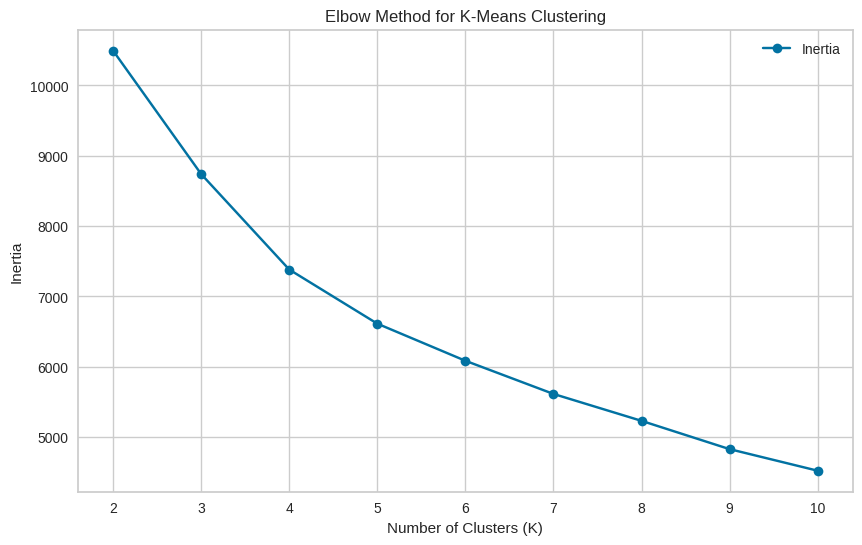

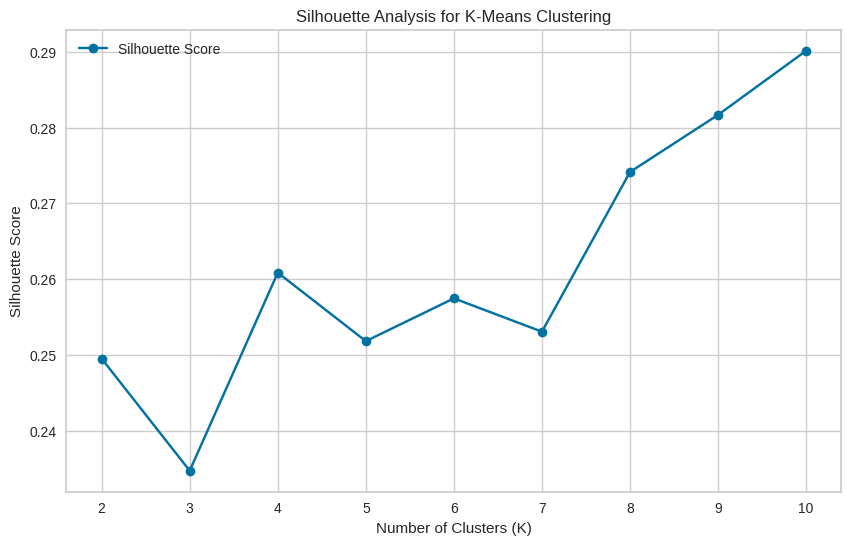

In [64]:
k_values = range(2, 11)  # Range from 2 to 10 (inclusive)
inertia_scores = []
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)

    inertia_scores.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

#Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_scores, marker='o', label='Inertia')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for K-Means Clustering')
plt.grid(True)
plt.legend()
plt.show()

# Plot Silhouette Analysis
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o', label='Silhouette Score')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for K-Means Clustering')
plt.grid(True)
plt.legend()
plt.show()

# Determine optimal K based on the plots
# A sharp elbow in the inertia plot and scores closer to 1 in the silhouette plot suggest a good K


### 5. KMeans Model Prediction

Once you decided the optimal K, once again fit a model with that K value and store the silhouette score and the labels for the entire data.

It is observed that the optimal value of k is 4. So, let's store the values of inertia and labels for k=4.

In [65]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X_scaled)
inertia_score = kmeans.inertia_
label = kmeans.labels_
print(inertia_score, label)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


7382.314744890413 [3 1 2 ... 2 1 2]


### 6. DBSCAN model training - Scikit-Learn

Using sklear.clusters.DBSCAN, you have to fit a model on the data.

But, here we would like to deal with two hyperparameters : epsilon and minimum number of samples.

Make two lists. One with some probable values for epsilon, other with probable values for min_samples.

Example : eps= [0.1,0.2,0.5,1,2] , min_samples=[3,4,5,6]

Run a nested loop. for each value of eps and min_samples, fit a dbscan model on the data and calculate the silhouette score. Find the parameters for which the silhouette score is maximum.

In [66]:
# List of epsilon values to evaluate
epsilon_values = [0.1, 0.2, 0.5, 1, 2]

# List of min_samples values to evaluate
min_samples_values = [3, 4, 5, 6]

# Maximum silhouette score and corresponding parameters (initialization)
max_silhouette_score = -1
best_epsilon = None
best_min_samples = None

In [67]:
# Loop through epsilon values
for epsilon in epsilon_values:
    # Loop through min_samples values
    for min_samples in min_samples_values:
        # Create a DBSCAN model
        dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)

        # Fit the model to the data
        dbscan.fit(X_scaled)

        # Calculate silhouette score
        silhouette_score_current = silhouette_score(X_scaled, dbscan.labels_)

        # Update maximum score and parameters if better
        if silhouette_score_current > max_silhouette_score:
            max_silhouette_score = silhouette_score_current
            best_epsilon = epsilon
            best_min_samples = min_samples

# Print results
print("Best Silhouette Score:", max_silhouette_score)
print("Epsilon:", best_epsilon)
print("Min Samples:", best_min_samples)

Best Silhouette Score: 0.5697880739264389
Epsilon: 1
Min Samples: 3
